Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


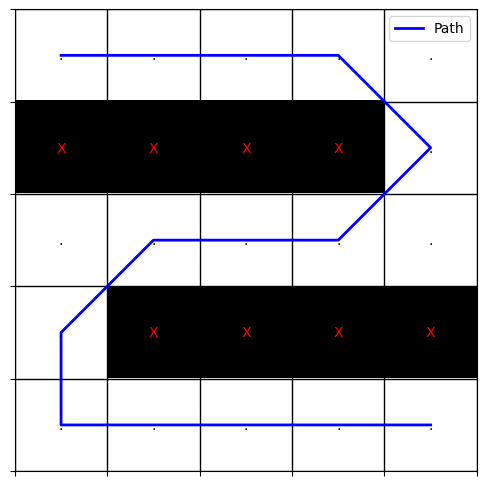

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# Directions for movement (up, down, left, right, and diagonals) 
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)] 
 
def heuristic(a, b): 
    """Calculate the Manhattan distance heuristic.""" 
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) 
 
def ida_star(grid, start, goal): 
    """ 
    Iterative Deepening A* (IDA*) algorithm to find the shortest path 
in a grid. 
     
    Args: 
        grid: 2D list representing the grid. 
        start: Tuple (x, y) for the start position. 
        goal: Tuple (x, y) for the goal position. 
     
    Returns: 
        Path as a list of (x, y) tuples if found, else None. 
    """ 
    def search(path, g, threshold): 
        node = path[-1] 
        f = g + heuristic(node, goal) 
        if f > threshold: 
            return f 
        if node == goal: 
            return path 
        min_cost = float('inf') 
        for dx, dy in DIRECTIONS: 
            neighbor = (node[0] + dx, node[1] + dy) 
            if ( 
                0 <= neighbor[0] < len(grid) and 
                0 <= neighbor[1] < len(grid[0]) and 
                grid[neighbor[0]][neighbor[1]] == 0 and 
                neighbor not in path 
            ): 
                result = search(path + [neighbor], g + 1, threshold) 
                if isinstance(result, list):  # Path found 
                    return result 
                min_cost = min(min_cost, result) 
        return min_cost 
 
    threshold = heuristic(start, goal) 
    path = [start] 
    while True: 
        result = search(path, 0, threshold) 
        if isinstance(result, list):  # Path found 
            return result 
        if result == float('inf'):  # No path exists 
            return None 
        threshold = result 
 
def visualize_grid(grid, path=None): 
    """Visualize the grid and the path.""" 
    grid = np.array(grid) 
    fig, ax = plt.subplots(figsize=(6, 6)) 
    ax.imshow(grid, cmap='gray_r', origin='upper') 
 
    # Plot the path 
    if path: 
        for (x, y) in path: 
            grid[x][y] = 0.5  # Mark the path 
        path_coords = list(zip(*path)) 
        ax.plot(path_coords[1], path_coords[0], color='blue', 
linewidth=2, label="Path") 
     
    # Show the grid with labels 
    for i in range(grid.shape[0]): 
        for j in range(grid.shape[1]): 
            c = 'X' if grid[i][j] == 1 else ('.' if grid[i][j] == 0 
else 'P') 
            ax.text(j, i, c, ha='center', va='center', color='red' if 
c == 'X' else 'black') 
     
    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1)) 
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1)) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([]) 
    ax.grid(color='black', linestyle='-', linewidth=1) 
    ax.legend() 
    plt.show() 
 
# Example Usage 
if __name__ == "__main__": 
    grid = [ 
        [0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 0], 
        [0, 0, 0, 0, 0], 
        [0, 1, 1, 1, 1], 
        [0, 0, 0, 0, 0], 
    ] 
    start = (0, 0) 
    goal = (4, 4) 
 
    path = ida_star(grid, start, goal) 
    if path: 
        print("Path found:", path) 
        visualize_grid(grid, path) 
    else: 
        print("No path found.")